# Predict Stock Prices

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('final_merged_data.csv')
df.head()

,Stock,Date,month_year,Adj Close,Close,High,Low,Open,Volume,content,topic
0,AVXL,9/30/20,20-Sep,4.55,4.55,4.819,4.420,4.49,1241300,new york sept 10 2020 globe newswire anavex li...,anavex life science announces completion anave...
1,AVXL,10/31/20,20-Oct,5.90,5.90,6.030,5.710,5.97,914200,clinically meaningful dosedependent statistica...,anavex life science announces positive result ...
2,AVXL,11/30/20,20-Nov,5.33,5.33,5.500,5.190,5.43,783200,statistically significant improvement cdr syst...,proof concept controlled phase 2 clinical tria...
3,AVXL,12/31/20,20-Dec,5.40,5.40,5.680,5.310,5.43,965800,primary safety pharmacokinetics secondary effi...,anavex life science announces anavex273 blarca...
4,AVXL,1/31/21,21-Jan,6.28,6.28,6.690,6.122,6.38,959100,new york jan 11 2021 globe newswire anavex lif...,anavex life science receives michael j fox fou...


In [3]:
df['Date'].value_counts()

9/30/20     4
10/31/20    4
11/30/20    4
12/31/20    4
1/31/21     4
2/28/21     4
3/31/21     4
4/30/21     4
5/31/21     4
6/30/21     4
7/31/21     4
8/31/21     4
9/30/21     4
Name: Date, dtype: int64

In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')
df['Close'].describe()

count    52.000000
mean     17.951154
std      18.763591
min       4.550000
25%       7.325000
50%       9.595000
75%      17.960001
max      85.440002
Name: Close, dtype: float64

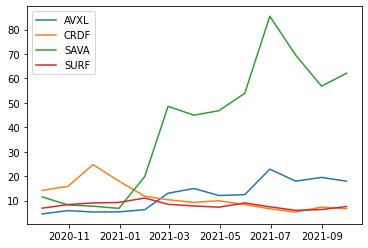

In [5]:
df_plot = df.set_index('Date')

fig, ax = plt.subplots()
for stock, data in df_plot.groupby("Stock"):
    ax.plot(data.index, data["Close"], label=stock)
ax.legend()
plt.show()

# Using Content only

# Unigrams with Tf-idf

LinearRegression
Mean Squared Error: 43.817306291654674
Mean Absolute Error: 5.369927814634985
R-squared: 0.8993020862255378



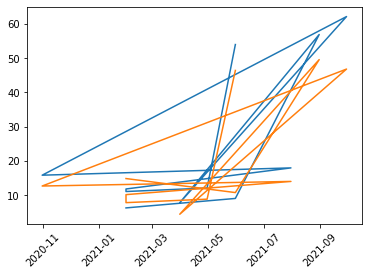

DecisionTreeRegressor
Mean Squared Error: 194.94477466247608
Mean Absolute Error: 10.264242288030301
R-squared: 0.5519913529352953



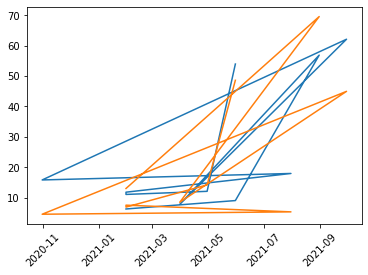

KNeighborsRegressor
Mean Squared Error: 75.51188314818704
Mean Absolute Error: 5.952727152181819
R-squared: 0.8264637938354594



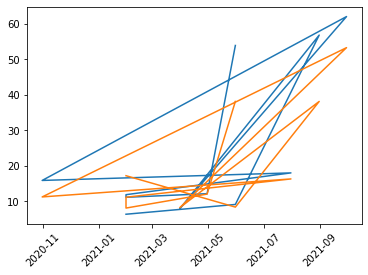

SVR
Mean Squared Error: 591.2340753049112
Mean Absolute Error: 14.722721437566525
R-squared: -0.35873340865129655



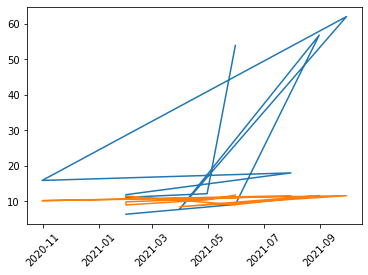

RandomForestRegressor
Mean Squared Error: 186.38734770741738
Mean Absolute Error: 8.494972659768248
R-squared: 0.5716574418526754



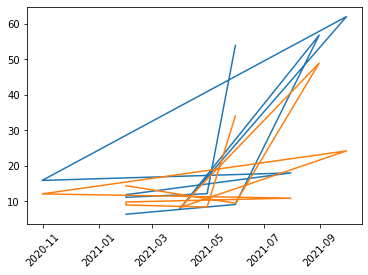

In [6]:
X = df[['content','Stock']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = df['Stock'])
X_train['Stock'].value_counts()
X_test['Stock'].value_counts()

X_train.drop(columns = 'Stock', inplace=True)
X_test.drop(columns = 'Stock', inplace=True)

tfidf_vect = TfidfVectorizer()
X_train = tfidf_vect.fit_transform(X_train['content'])
X_test = tfidf_vect.transform(X_test['content'])

lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()
svr = SVR()
rf = RandomForestRegressor()

for reg in [lr, dt, knn, svr, rf]:
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print(reg.__class__.__name__)
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
    print(f"R-squared: {r2_score(y_test, y_pred)}")
    print()
    plt.plot(df.loc[y_test.index, 'Date'], y_test)
    plt.plot(df.loc[y_test.index, 'Date'], y_pred)
    plt.xticks(rotation=45)
    plt.show()

# N-grams with Tf-idf

LinearRegression
Mean Squared Error: 35.37247555997242
Mean Absolute Error: 4.538038652491216
R-squared: 0.9187094142616026



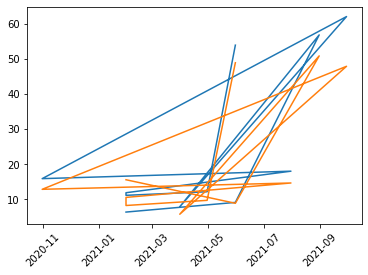

DecisionTreeRegressor
Mean Squared Error: 773.4558695804485
Mean Absolute Error: 20.46909119690909
R-squared: -0.7775029789587398



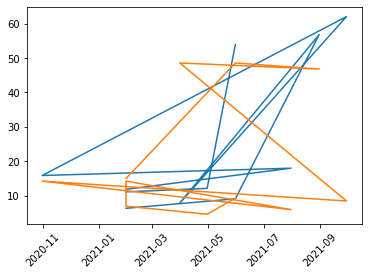

KNeighborsRegressor
Mean Squared Error: 75.50362057732835
Mean Absolute Error: 6.026545315600001
R-squared: 0.8264827823064154



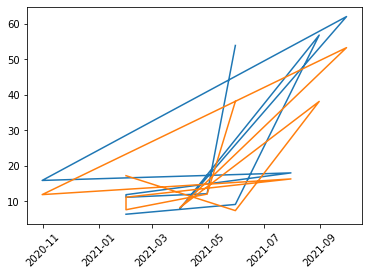

SVR
Mean Squared Error: 610.7381200181316
Mean Absolute Error: 14.995979391044706
R-squared: -0.4035562601454601



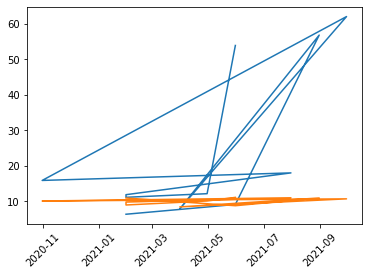

RandomForestRegressor
Mean Squared Error: 180.85733437283983
Mean Absolute Error: 8.616450052588915
R-squared: 0.5843661374130635



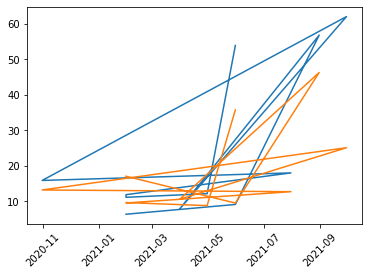

In [7]:
X = df[['content','Stock']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = df['Stock'])
X_train['Stock'].value_counts()
X_test['Stock'].value_counts()

X_train.drop(columns = 'Stock', inplace=True)
X_test.drop(columns = 'Stock', inplace=True)

tfidf_vect = TfidfVectorizer(ngram_range=(1, 3))
X_train = tfidf_vect.fit_transform(X_train['content'])
X_test = tfidf_vect.transform(X_test['content'])

lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()
svr = SVR()
rf = RandomForestRegressor()

for reg in [lr, dt, knn, svr, rf]:
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print(reg.__class__.__name__)
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
    print(f"R-squared: {r2_score(y_test, y_pred)}")
    print()
    plt.plot(df.loc[y_test.index, 'Date'], y_test)
    plt.plot(df.loc[y_test.index, 'Date'], y_pred)
    plt.xticks(rotation=45)
    plt.show()

# Using Content & Topic

In [8]:
df['content_topic'] = df['content'] + ' ' + df['topic']

# Unigrams with Tf-idf

LinearRegression
Mean Squared Error: 47.15294162361668
Mean Absolute Error: 5.341646554199648
R-squared: 0.8916363589714429



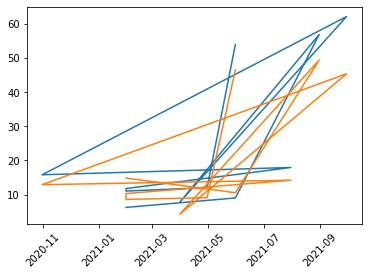

DecisionTreeRegressor
Mean Squared Error: 628.9081657543653
Mean Absolute Error: 17.087879122575757
R-squared: -0.445313407119458



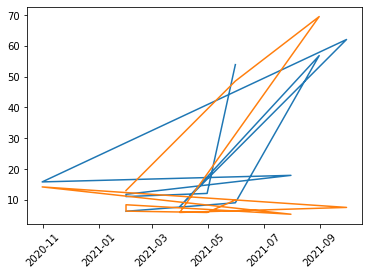

KNeighborsRegressor
Mean Squared Error: 77.9488836530025
Mean Absolute Error: 6.221636251000001
R-squared: 0.82086324721425



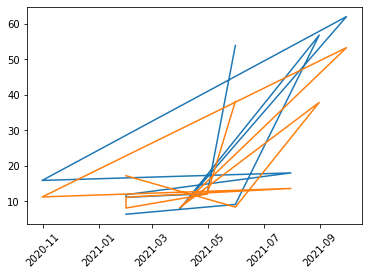

SVR
Mean Squared Error: 590.9981939321941
Mean Absolute Error: 14.719310815487585
R-squared: -0.3581913223356117



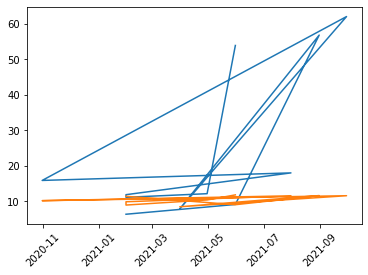

RandomForestRegressor
Mean Squared Error: 220.07109268587584
Mean Absolute Error: 10.088813599812555
R-squared: 0.49424778036264916



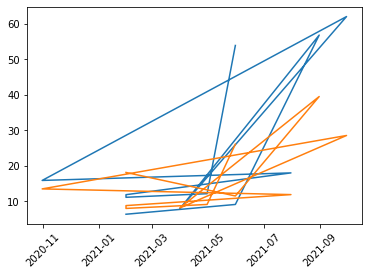

In [9]:

X = df[['content_topic','Stock']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = df['Stock'])
X_train['Stock'].value_counts()
X_test['Stock'].value_counts()

X_train.drop(columns = 'Stock', inplace=True)
X_test.drop(columns = 'Stock', inplace=True)

tfidf_vect = TfidfVectorizer()
X_train = tfidf_vect.fit_transform(X_train['content_topic'])
X_test = tfidf_vect.transform(X_test['content_topic'])

lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()
svr = SVR()
rf = RandomForestRegressor()

for reg in [lr, dt, knn, svr, rf]:
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print(reg.__class__.__name__)
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
    print(f"R-squared: {r2_score(y_test, y_pred)}")
    print()
    plt.plot(df.loc[y_test.index, 'Date'], y_test)
    plt.plot(df.loc[y_test.index, 'Date'], y_pred)
    plt.xticks(rotation=45)
    plt.show()

# N-grams with Tf-idf

LinearRegression
Mean Squared Error: 40.060275888160376
Mean Absolute Error: 4.683264328181038
R-squared: 0.9079362345937855



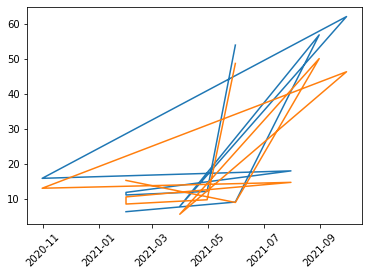

DecisionTreeRegressor
Mean Squared Error: 543.627607453851
Mean Absolute Error: 15.007273110000002
R-squared: -0.24932750490029876



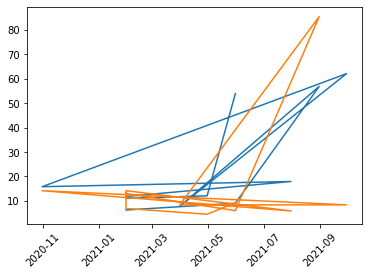

KNeighborsRegressor
Mean Squared Error: 75.50362057732835
Mean Absolute Error: 6.026545315600001
R-squared: 0.8264827823064154



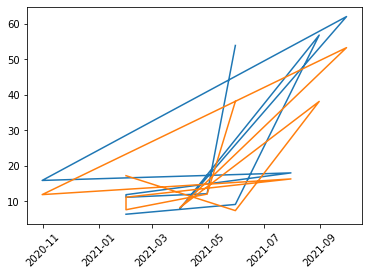

SVR
Mean Squared Error: 611.1807066821232
Mean Absolute Error: 14.99753757044336
R-squared: -0.40457338231704476



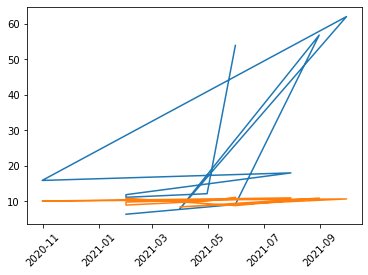

RandomForestRegressor
Mean Squared Error: 172.7674903627479
Mean Absolute Error: 8.79922453443845
R-squared: 0.6029576594284695



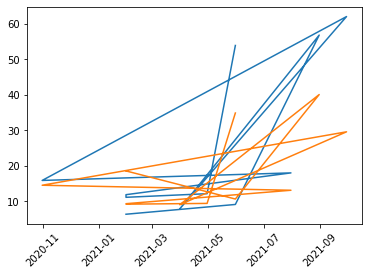

In [10]:
X = df[['content_topic','Stock']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = df['Stock'])
X_train['Stock'].value_counts()
X_test['Stock'].value_counts()

X_train.drop(columns = 'Stock', inplace=True)
X_test.drop(columns = 'Stock', inplace=True)

tfidf_vect = TfidfVectorizer(ngram_range=(1, 3))
X_train = tfidf_vect.fit_transform(X_train['content_topic'])
X_test = tfidf_vect.transform(X_test['content_topic'])

lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()
svr = SVR()
rf = RandomForestRegressor()

for reg in [lr, dt, knn, svr, rf]:
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print(reg.__class__.__name__)
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
    print(f"R-squared: {r2_score(y_test, y_pred)}")
    print()
    plt.plot(df.loc[y_test.index, 'Date'], y_test)
    plt.plot(df.loc[y_test.index, 'Date'], y_pred)
    plt.xticks(rotation=45)
    plt.show()